In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def buildTrain(train, pastDay=1, futureDay=1):
    X_train, Y_train ,Z_train= [], [],[]
    for i in range(train.shape[0]-futureDay-pastDay+1):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["high"]))
        Z_train.append(np.array(train.iloc[i+pastDay-1:i+pastDay+futureDay-1]["high"]))
    return np.array(X_train), np.array(Y_train), np.array(Z_train)
def shuffle(X,Y,Z):
    np.random.seed()
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList],Z[randomList]
def splitData(X,Y,Z,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    Z_val = Z[:int(Z.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val,Z_val

In [3]:
train = pd.read_csv(r"C:\Users\admin\Desktop\Project\data\台北一\蔬果\奇異果-進口.csv")
train=train.drop(["Unnamed: 0"], axis=1)
train=train.drop(["crop_name"], axis=1)
train=train.drop(["crop_num"], axis=1)
train=train.drop(["market_name"], axis=1)
train=train.drop(["market_num"], axis=1)
temp=train
train= train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
train_x1,train_y1,train_z1=buildTrain(train)
train_x2,train_y2,train_z2=buildTrain(temp)
train_x,train_y,train_z=train_x1,train_y2,train_z2
train_x,train_y,train_z= shuffle(train_x,train_y,train_z)
train_x,train_y, val_x, val_y ,val_z= splitData(train_x,train_y,train_z, 0.05)

In [4]:
model = Sequential()
model.add(LSTM(200, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(150))
model.add(Dropout(0.6))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(train_x,train_y, epochs=300, batch_size=32, validation_split=0.1, callbacks=[callback])

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, input_shape=(1, 9), return_sequences=True)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            168000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               210600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 378,751
Trainable params: 378,751
Non-trainable params: 0
_________________________________________________________________
Trai

accuracy:58.490566037735846%
accuracy(50%):21.69811320754717%


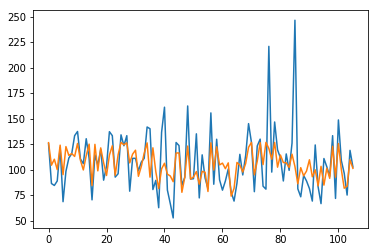

In [6]:
a=range(0,val_y.shape[0])
val_y=val_y.reshape(-1)
val_z=val_z.reshape(-1)
plt.plot(a,val_y)
b=[]
co=0
coo=0
for i in range(0,val_x.shape[0]):
    temp=val_x[i]
    temp=temp.reshape(1,1,9)
    z=model.predict(temp, verbose=0)
    if val_y[i]>=val_z[i] and z>=val_z[i]:
        co=co+1
    if val_y[i]<val_z[i] and z<val_z[i]:
        co=co+1
    sub=val_y[i]-val_z[i]
    sub_a=0.5*sub+val_z[i]
    sub_b=1.5*sub+val_z[i]
    sub2=val_z[i]-val_y[i]
    sub2_a=val_z[i]-0.5*sub2
    sub2_b=val_z[i]-1.5*sub2
    if val_y[i]>=val_z[i] and z>=val_z[i]:
        if z>=sub_a and z<=sub_b:
            coo=coo+1
    if val_y[i]<val_z[i] and z<val_z[i]:
        if z<=sub2_a and z>=sub2_b:
            coo=coo+1
    b.append(z)
b=np.array(b)
b=b.reshape(-1)
plt.plot(a,b)
acc=100*(co/val_x.shape[0])
print("accuracy:"+str(acc)+"%")
acc2=100*(coo/val_x.shape[0])
print("accuracy(50%):"+str(acc2)+"%")
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(64, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(train_x,train_y, epochs=300, batch_size=8, validation_split=0.1, callbacks=[callback])

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, return_sequences=True, input_shape=(1, 9))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 64)             18944     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________
Train 

accuracy:63.84976525821596%


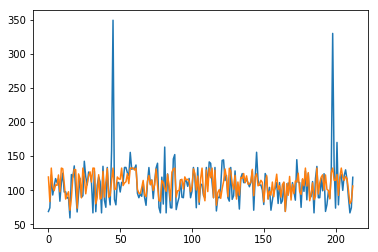

In [5]:
a=range(0,val_y.shape[0])
val_y=val_y.reshape(-1)
val_z=val_z.reshape(-1)
plt.plot(a,val_y)
b=[]
co=0
for i in range(0,val_x.shape[0]):
    temp=val_x[i]
    temp=temp.reshape(1,1,9)
    z=model.predict(temp, verbose=0)
    if val_y[i]>=val_z[i] and z>=val_z[i]:
        co=co+1
    if val_y[i]<val_z[i] and z<val_z[i]:
        co=co+1
    b.append(z)
b=np.array(b)
b=b.reshape(-1)
plt.plot(a,b)
acc=100*(co/val_x.shape[0])
print("accuracy:"+str(acc)+"%")
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(200, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(train_x,train_y, epochs=300, batch_size=16, validation_split=0.1, callbacks=[callback])

In [ ]:
a=range(0,val_y.shape[0])
val_y=val_y.reshape(-1)
val_z=val_z.reshape(-1)
plt.plot(a,val_y)
b=[]
co=0
for i in range(0,val_x.shape[0]):
    temp=val_x[i]
    temp=temp.reshape(1,1,9)
    z=model.predict(temp, verbose=0)
    if val_y[i]>=val_z[i] and z>=val_z[i]:
        co=co+1
    if val_y[i]<val_z[i] and z<val_z[i]:
        co=co+1
    b.append(z)
b=np.array(b)
b=b.reshape(-1)
plt.plot(a,b)
acc=100*(co/val_x.shape[0])
print("accuracy:"+str(acc)+"%")
plt.show()